- _purpose_:

- _status_:

- _next_:

- _conclusion_:

## RVT default module

This example notebook shows how the rvt.default module can quickly calculate or save any rvt visualization.

This notebook is suitable for beginner python users.

### Before you start
You'll need a DEM to work through this notebook. 

Download the test data from [Getting started](https://rvt-py.readthedocs.io/en/latest/start_main.html), or have some of your own data ready to work with. 

Save your data in a directory called test_data. You'll need to set a path to this test data in cell [2].

### Working with visualization parameters

To calculate a visualization we need to use visualization parameters (e.g. hillshade sun azimuth). 

The default module has the rvt.default.DefultValues() class. All visualization parameters are stored as **attributes** of this class. 

This class also contains **methods** to calculate the numpy array of a specific visualization, or to calculate and save a specific visualization as a GeoTIFF. All methods use class atributes (or set parameters). 

For **get** methods we need the DEM numpy array, for **save** methods we need the DEM path. 

If you call a save method for a specific visualization (e.g. default.save_hillshade()) it will be saved in the DEM directory (dem_path). To change the output directory, input the output directory as a string in custom_dir (save methods parameter). 

Save methods also have two boolean parameters: save_float and save_8bit. If save_float is True, the method will save the visulization as float. If save_8bit is True, the method will bytescale visualization (0-255) and save it. Both can be True, if you want to save both.

----

Ok, let's import the required modules:

In [1]:
import os
import sys

import numpy as np
import pandas as pd

import rvt.default

import matplotlib.pyplot as plt
import rasterio

sys.path.append(os.path.join(
    os.getcwd(),
    "src"
    )
)

from project_utils import satellite as satellite

To get the visualization array we need to input the DEM numpy array. 

We will use the default module function get_raster_arr() to read it.

In [2]:
# check lidar points per m**2
filename = "CAN_A01_2014_laz_5.laz"
df = pd.read_csv("data/metadata/cms_brazil_lidar_tile_metadata.csv")
row = df[df["filename"] == filename]

coords = satellite.get_coords_from_df(df, filename)
area_m = satellite.get_bbox_area_from_coords(coords)
print(area_m)

points = 18e6

points_per_m2 = points/area_m
print(points_per_m2)

754401.0083023793
23.859989318552493


filename: CAN_A01_2014_laz_5_new_new_dtm
resolution: (2.0, 2.0)
dem_arr dimensions: 369 x 500
Bands: 1
Shape: 369 x 500
CRS: None
Transform: | 2.00, 0.00, 359000.00|
| 0.00,-2.00, 7441738.00|
| 0.00, 0.00, 1.00|


/opt/miniconda3/envs/openai_to_z/lib/python3.10/site-packages/osgeo/gdal.py:311: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


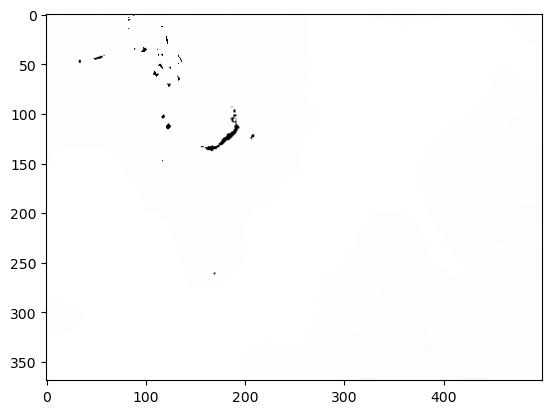

In [3]:
# rvt example dem
dem_path_example = "data/example/processed/TM1_564_146.tif" # rvt example dem
dem_path_mine = "data/processed/dtm/CAN_A01_2014_laz_5_new_new_dtm.tif" # mine

def print_metadata(dem_path):
    filename = os.path.splitext(dem_path)[0].split("/")[-1]
    print(f"filename: {filename}")
    dict_dem = rvt.default.get_raster_arr(dem_path)
    dem_arr = dict_dem["array"]  # numpy array of DEM
    dem_resolution = dict_dem["resolution"]
    dem_res_x = dem_resolution[0]  # resolution in X direction
    dem_res_y = dem_resolution[1]  # resolution in Y direction
    dem_no_data = dict_dem["no_data"]

    try:
        plt.imshow(dem_arr, cmap='gray')  # show DEM
    except Exception as e:
        print(f"Failed to show dem_arr: {e}")

    print(f"resolution: {dict_dem['resolution']}")

    try:
        print(f"dem_arr dimensions: {len(dem_arr)} x {len(dem_arr[0])} x {len(dem_arr[0][0])}")
    except TypeError as e:
        print(f"dem_arr dimensions: {len(dem_arr)} x {len(dem_arr[0])}")

    with rasterio.open(dem_path) as src:
        print(f"Bands: {src.count}")
        print(f"Shape: {src.height} x {src.width}")
        print(f"CRS: {src.crs}")
        print(f"Transform: {src.transform}")

# print_metadata(dem_path_example)
print_metadata(dem_path_mine)

File: data/example/processed/TM1_564_146.tif
Bands: 1, Size: 1000x1000


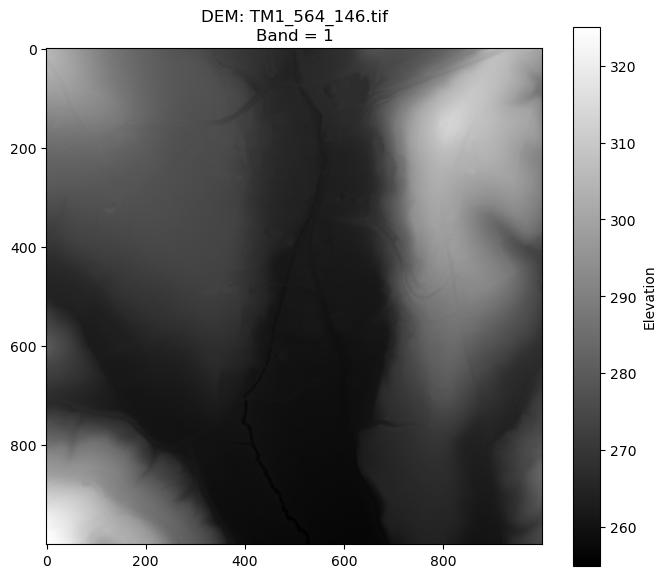

File: data/processed/dtm/CAN_A01_2014_laz_5_new_new_dtm.tif
Bands: 1, Size: 500x369


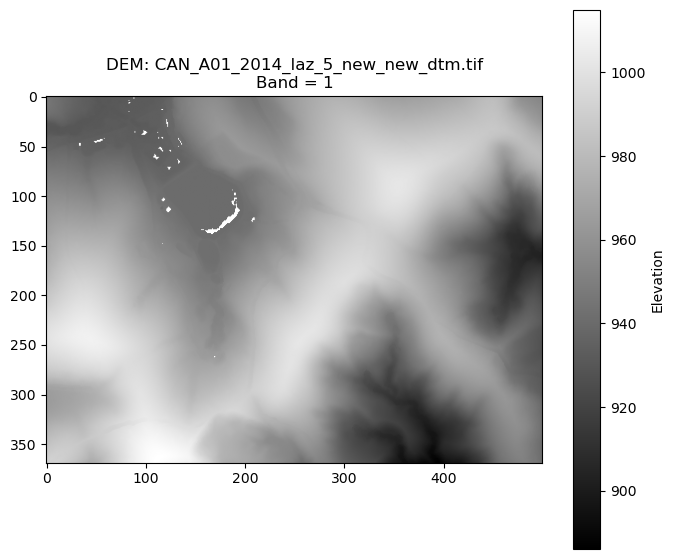

In [4]:
band=1
for dem_path in [dem_path_example, dem_path_mine]:
    with rasterio.open(dem_path) as src:
        print(f"File: {dem_path}")
        print(f"Bands: {src.count}, Size: {src.width}x{src.height}")
        if src.count == 1:
            dem = src.read(1)
        else:
            dem = src.read(band)  # just display first band for now
        no_data = src.nodatavals[0]
    if no_data is not None:
        dem = np.where(dem == no_data, np.nan, dem)

    dem_resolution = src.res
    dem_res_x = dem_resolution[0]  # resolution in X direction
    dem_res_y = dem_resolution[1]  # resolution in Y direction
    plt.figure(figsize=(8,7))
    plt.imshow(dem, cmap="gray")
    plt.title(f"DEM: {dem_path.split('/')[-1]}\nBand = {band}")
    plt.colorbar(label="Elevation")
    plt.show()
    dem_arr = dem

In [125]:
# # my pdal generated dtm (calling it dem from here on to stay consistent with the notebooks terminology)
# # dem_path = "data/processed/dtm/CAN_A01_2014_laz_5_new_dtm.tif"
# dtm_dir = os.path.join(
#     os.getcwd(),
#     "data",
#     "processed",
#     "dtm"
# )
# dtm_filenames = os.listdir(dtm_dir)
# for filename in dtm_filenames:
#     print(filename)

# INDEX = len(dtm_filenames)-1
# dtm_path = os.path.join(dtm_dir, dtm_filenames[INDEX])
# dem_path = "data/processed/dtm/CAN_A01_2014_laz_5_new_new_dtm.tif"
# filename = os.path.splitext(dtm_path)[0].split("/")[-1]
# print(f"filename: {filename}")
# print(f"dtm path: {dtm_path}")
# print(" ")

# dem_arr = dict_dem["array"]  # numpy array of DEM

# dem_resolution = dict_dem["resolution"]
# dem_res_x = dem_resolution[0]  # resolution in X direction
# dem_res_y = dem_resolution[1]  # resolution in Y direction
# dem_no_data = dict_dem["no_data"]

# plt.imshow(dem_arr, cmap='gray')  # show DEM

In [34]:
# for index in range(len(dtm_filenames)):
#     filename = dtm_filenames[INDEX]
#     INDEX = 0
#     dtm_path = os.path.join(dtm_dir, filename)
#     print(dtm_path)
#     try:
#         dict_dem = rvt.default.get_raster_arr(dtm_path)
#         dem_arr = dict_dem["array"]  # numpy array of DEM
#         dem_resolution = dict_dem["resolution"]
#         dem_res_x = dem_resolution[0]  # resolution in X direction
#         dem_res_y = dem_resolution[1]  # resolution in Y direction
#         dem_no_data = dict_dem["no_data"]

#         plt.imshow(dem_arr, cmap='gray')  # show DEM
#     except Exception as e:
#         print("Error with {filename}: {e}")

Create rvt.default.DefaultValues() class:

In [5]:
default = rvt.default.DefaultValues()  # we created instance of class and stored it in default variable

### Slope

Set parameters:

In [6]:
default.slp_output_units = "degree"

Calculate numpy array:

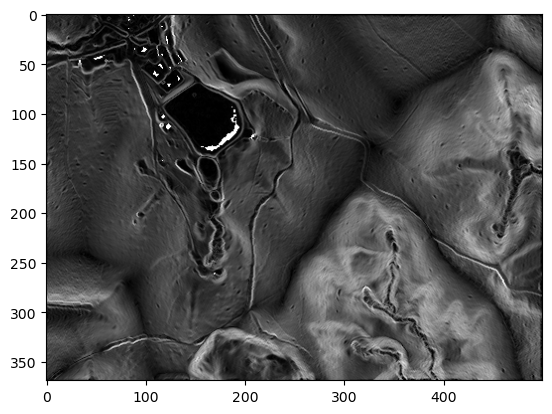

In [7]:
slope_arr = default.get_slope(dem_arr=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y)
plt.imshow(slope_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [8]:
default.save_slope(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Hillshade

Set parameters:

In [9]:
default.hs_sun_el = 35 
default.hs_sun_azi = 315

Calculate numpy array:

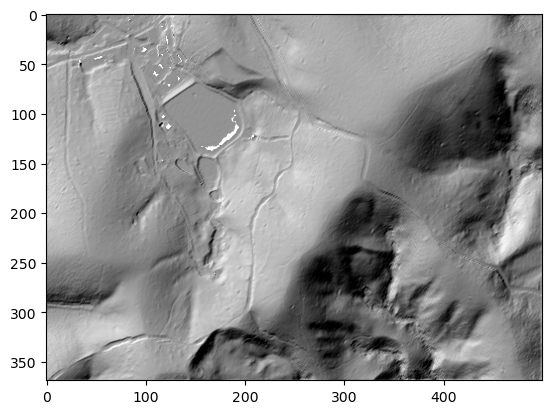

In [10]:
hillshade_arr = default.get_hillshade(dem_arr=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y)
plt.imshow(hillshade_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [11]:
default.save_hillshade(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Multiple directions hillshade

Set parameters:

In [12]:
default.mhs_nr_dir = 16
default.mhs_sun_el = 35

Calculate numpy array:

In [13]:
mhs_arr = default.get_multi_hillshade(dem_arr=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y)

Calculate and save as GeoTIFF in DEM directory:

In [14]:
default.save_multi_hillshade(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Simple Local Relief Model (SLRM)

Set parameters:

In [15]:
default.slrm_rad_cell = 20

Calculate numpy array:

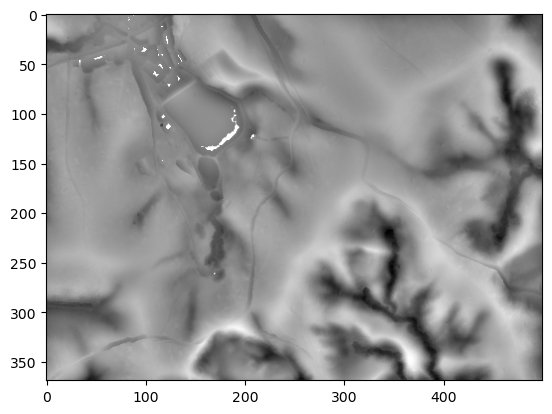

In [16]:
slrm_arr = default.get_slrm(dem_arr=dem_arr)
plt.imshow(slrm_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [17]:
default.save_slrm(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Multi-Scale Relief Model (MSRM)

Set parameters:

In [18]:
default.msrm_feature_min = 1
default.msrm_feature_max = 5
default.msrm_scaling_factor = 3

Calculate numpy array:

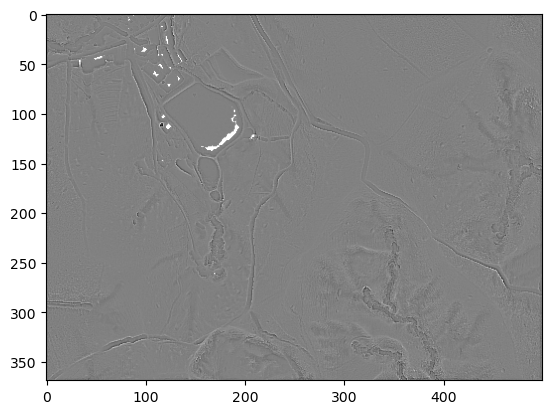

In [19]:
msrm_arr = default.get_msrm(dem_arr=dem_arr, resolution=dem_res_x)
plt.imshow(msrm_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [20]:
default.save_msrm(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Sky-view factor, Anisotropic sky-view factor, Positive openness

Set parameters:

In [21]:
# parameters for all three
default.svf_n_dir = 16
default.svf_r_max = 10
default.svf_noise = 0
# parameters for asvf
default.asvf_dir = 315
default.asvf_level = 1

Calculate numpy array:

In [22]:
svf_asvf_opns_dict = default.get_sky_view_factor(dem_arr=dem_arr, resolution=dem_res_x,
                                                 compute_svf=True, compute_asvf=True, compute_opns=True)

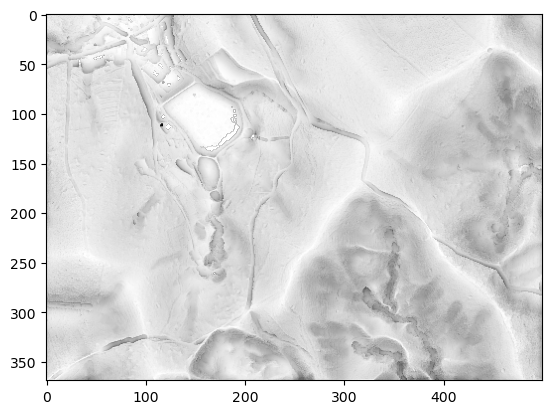

In [23]:
svf_arr = svf_asvf_opns_dict["svf"]
plt.imshow(svf_arr, cmap='gray')

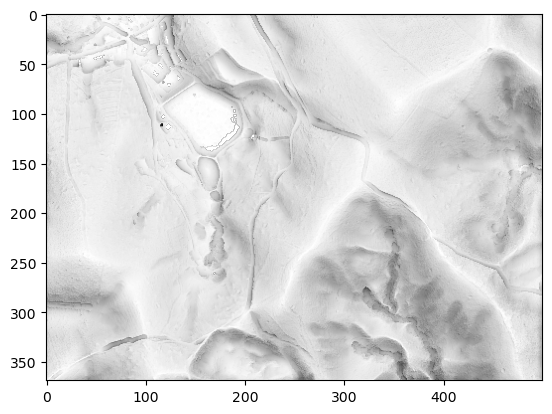

In [24]:
asvf_arr = svf_asvf_opns_dict["asvf"]
plt.imshow(asvf_arr, cmap='gray')

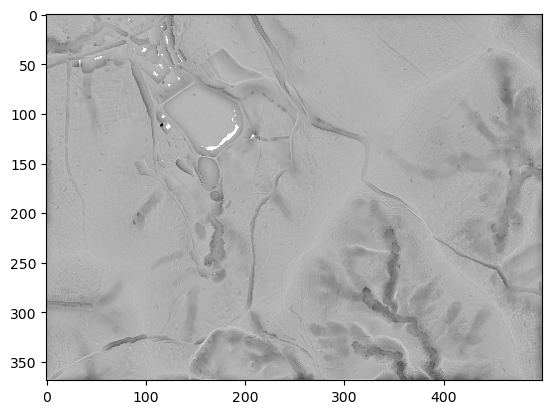

In [25]:
opns_arr = svf_asvf_opns_dict["opns"]
plt.imshow(opns_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [26]:
default.save_sky_view_factor(dem_path=dem_path, save_svf=True, save_asvf=True, save_opns=True,
                             custom_dir=None, save_float=True, save_8bit=True)

1

### Negative openness

Set parameters (svf_parameters):

In [27]:
default.svf_n_dir = 16
default.svf_r_max = 10
default.svf_noise = 0

Calculate numpy array:

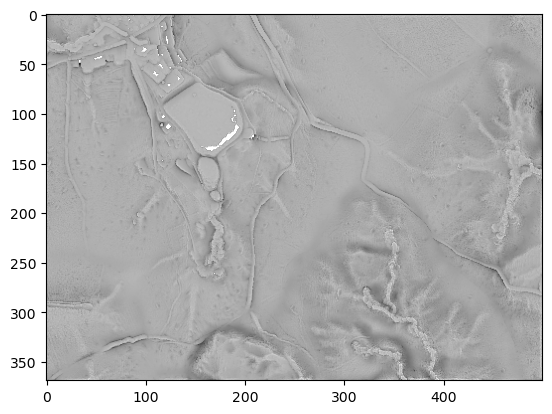

In [28]:
neg_opns_arr = default.get_neg_opns(dem_arr=dem_arr, resolution=dem_res_x)
plt.imshow(neg_opns_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [29]:
default.save_neg_opns(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Local dominance

Set parameters:

In [30]:
default.ld_min_rad = 10
default.ld_max_rad = 20
default.ld_rad_inc = 1
default.ld_anglr_res = 15
default.ld_observer_h = 1.7

Calculate numpy array:

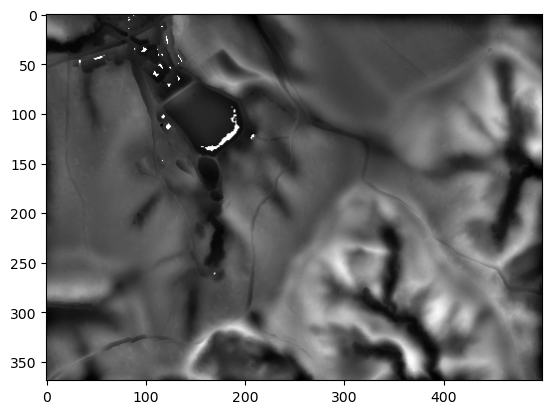

In [31]:
local_dom_arr = default.get_local_dominance(dem_arr=dem_arr)
plt.imshow(local_dom_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [32]:
default.save_local_dominance(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

1

### Sky illumination

Set parameters:

In [167]:
default.sim_sky_mod = "overcast"
default.sim_compute_shadow = 0
default.sim_shadow_dist = 100
default.sim_nr_dir = 32
default.sim_shadow_az = 315
default.sim_shadow_el = 35

Calculate numpy array:

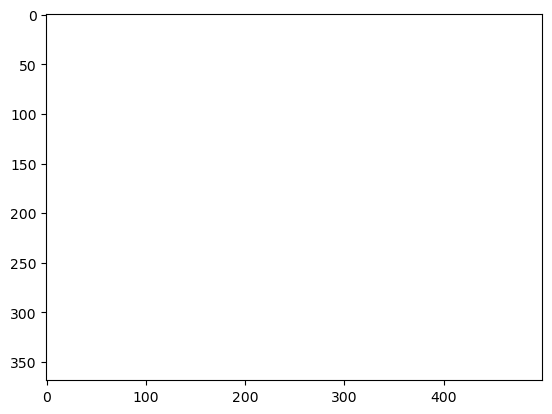

In [168]:
sky_illum_arr = default.get_sky_illumination(dem_arr=dem_arr, resolution=dem_res_x)
plt.imshow(sky_illum_arr, cmap='gray')

Calculate and save as GeoTIFF in DEM directory:

In [169]:
default.save_sky_illumination(dem_path=dem_path, custom_dir=None, save_float=True, save_8bit=True)

0

### Multi-Scale Topographic Position (MSTP)

Set parameters:

In [170]:
default.mstp_local_scale = (1, 5, 1)
default.mstp_meso_scale = (5, 50, 5)
default.mstp_broad_scale = (50, 500, 50)
default.mstp_lightness = 1.2

Calculate numpy array:

In [171]:
mstp_arr = default.get_mstp(dem_arr=dem_arr)

Calculate and save as GeoTIFF in DEM directory:

In [172]:
default.save_mstp(dem_path=dem_path, custom_dir=None)

0

File: data/processed/dtm/CAN_A01_2014_laz_5_new_new_dtm.tif


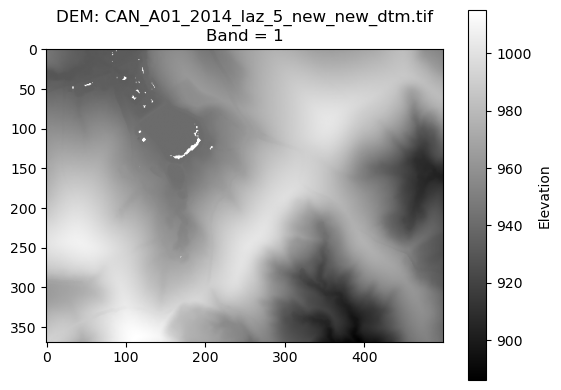

In [175]:
with rasterio.open(dem_path) as src:
    print(f"File: {dem_path}")
    #     print(f"Bands: {src.count}, Size: {src.width}x{src.height}")
    #     if src.count == 1:
    #         dem = src.read(1)
    #     else:
    #         dem = src.read(band)  # just display first band for now
    #     no_data = src.nodatavals[0]
    # if no_data is not None:
    #     dem = np.where(dem == no_data, np.nan, dem)

    # dem_resolution = src.res
    # dem_res_x = dem_resolution[0]  # resolution in X direction
    # dem_res_y = dem_resolution[1]  # resolution in Y direction
    # plt.figure(figsize=(8,7))
    plt.imshow(dem, cmap="gray")
    plt.title(f"DEM: {dem_path.split('/')[-1]}\nBand = {band}")
    plt.colorbar(label="Elevation")
    plt.show()
    dem_arr = dem